# CSV_Preprocessing (Object_Detection)

<a class="anchor" id="0"></a>
# Table of Contents

1. [套件安裝與載入](#1)
1. [環境檢測與設定](#2)
1. [資料處理參數設定](#3)
1. [資料處理](#4)
    -  [載入CSV檔](#4.1)
    -  [檢查CSV檔缺失值](#4.2)
    -  [從元數據提取寬度和高度欄位](#4.3)

# 1. 套件安裝與載入<a class="anchor" id="1"></a>
[Back to Table of Contents](#0)

In [1]:
# 資料處理套件
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 2. 環境檢測與設定<a class="anchor" id="2"></a>
[Back to Table of Contents](#0)

In [2]:
'''執行環境參數設定'''

# (Boolean)是否為本機
LOCAL = False

# (Boolean)是否為 Colab
COLAB = False


'''檔案路徑參數設定'''

# (String)Root路徑
if LOCAL:
    PATH = r'../'
elif COLAB:
    PATH = r'/content/drive/My Drive/Colab Notebooks/'
else:
    PATH = r'../input/'
    OUTPUT_PATH = r'/kaggle/working/'
    
# (String)資料根路徑
DATA_ROOT_PATH = PATH+r'vinbigdata-chest-xray-abnormalities-detection/'

# (String)meta資料根路徑
META_DATA_ROOT_PATH = PATH+r'vinbigdata-process-and-resize-to-png-256x256/'

# (String)訓練資料路徑
TRAIN_DATA_PATH = DATA_ROOT_PATH+r'train'

# (String)訓練CSV路徑，如為None則不讀CSV檔
TRAIN_CSV_PATH = DATA_ROOT_PATH+r'train.csv'

# (String)META_CSV路徑，如為None則不讀META_CSV檔
TRAIN_META_CSV_PATH = META_DATA_ROOT_PATH+r'train_meta.csv'

In [3]:
if not LOCAL and COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

# 3. 資料處理參數設定<a class="anchor" id="3"></a>
[Back to Table of Contents](#0)

In [4]:
'''客製參數設定'''


'''資料參數設定'''

# (String)圖片副檔名
IMAGE_NAME_EXTENSION = '.png'

# (String)CSV圖片檔名欄位
IMAGE_NAME = 'image_id'

# (String)CSV標籤欄位
LABEL_NAME = 'class_name'

# (String)CSV標籤ID欄位
LABEL_ID = 'class_id'

# (Int)CSV空物件框的標籤ID
REMOVE_LABEL_ID = 14


''''圖表參數設定'''

# (Float)全部SNS圖表的字形縮放
ALL_SNS_FONT_SCALE = 1.0

# (Int)CSV缺失值圖表寬度
CSV_COUNTPLOT_FIGSIZE_W = 10

# (Int)CSV缺失值圖表高度
CSV_COUNTPLOT_FIGSIZE_H = 10

# (Int)CSV缺失值圖表標題字型大小
CSV_COUNTPLOT_TITLE_FONTSIZE = 20

# (Int)CSV缺失值圖表X軸標題字型大小
CSV_COUNTPLOT_XLABEL_FONTSIZE = 15

# (Int)CSV缺失值圖表Y軸標題字型大小
CSV_COUNTPLOT_YLABEL_FONTSIZE = 15

In [5]:
# 設置sns圖表縮放係數
sns.set(font_scale = ALL_SNS_FONT_SCALE)

# 4. 資料處理<a class="anchor" id="4"></a>
[Back to Table of Contents](#0)

## 4.1 載入CSV檔 <a class="anchor" id="4.1"></a>
[Back to Table of Contents](#0)

In [6]:
print('Reading data...')

# 讀取訓練資料集CSV檔
train_csv = pd.read_csv(TRAIN_CSV_PATH,encoding="utf8")
train_csv['image_path'] = TRAIN_DATA_PATH + train_csv[IMAGE_NAME] + IMAGE_NAME_EXTENSION

print('Reading data completed')

Reading data...
Reading data completed


In [7]:
# 顯示訓練資料集CSV檔
train_csv.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,image_path
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,../input/vinbigdata-chest-xray-abnormalities-d...
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,../input/vinbigdata-chest-xray-abnormalities-d...
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,../input/vinbigdata-chest-xray-abnormalities-d...
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,../input/vinbigdata-chest-xray-abnormalities-d...
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,../input/vinbigdata-chest-xray-abnormalities-d...


In [8]:
print("Shape of train_data :", train_csv.shape)

Shape of train_data : (67914, 9)


## 4.2 檢查CSV檔缺失值 <a class="anchor" id="4.2"></a>
[Back to Table of Contents](#0)

In [9]:
# 缺失值比率
total = train_csv.isnull().sum().sort_values(ascending = False)
percent = (train_csv.isnull().sum()/train_csv.isnull().count()*100).sort_values(ascending = False)
missing_train_csv  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_csv.head()

,Total,Percent
x_min,31818,46.850428
y_min,31818,46.850428
x_max,31818,46.850428
y_max,31818,46.850428
image_id,0,0.000000


In [10]:
train_csv[LABEL_NAME].value_counts()

No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: class_name, dtype: int64

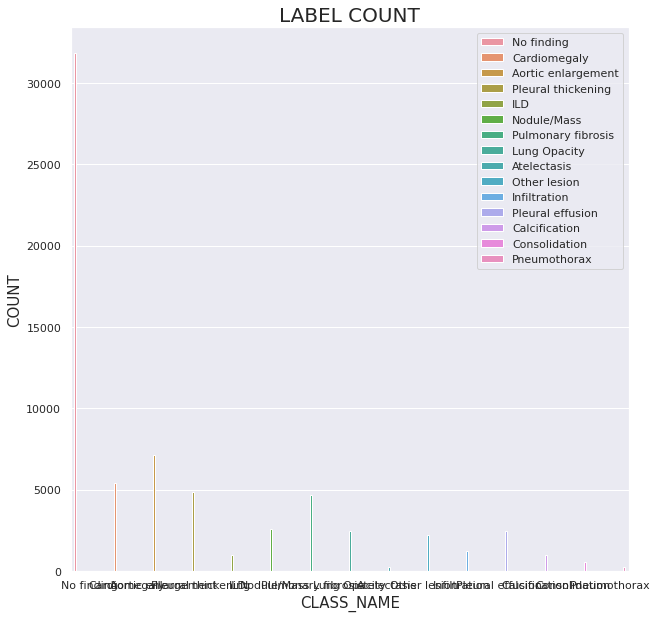

In [11]:
f,ax = plt.subplots(figsize=(CSV_COUNTPLOT_FIGSIZE_W, CSV_COUNTPLOT_FIGSIZE_H))
sns.countplot(train_csv[LABEL_NAME], hue = train_csv[LABEL_NAME],ax = ax)
plt.title("LABEL COUNT", fontsize=CSV_COUNTPLOT_TITLE_FONTSIZE)
plt.xlabel(LABEL_NAME.upper(), fontsize=CSV_COUNTPLOT_XLABEL_FONTSIZE)
plt.ylabel("COUNT", fontsize=CSV_COUNTPLOT_YLABEL_FONTSIZE)
plt.legend()
plt.show()

## 4.3 從元數據提取寬度和高度欄位 <a class="anchor" id="4.3"></a>
[Back to Table of Contents](#0)

In [12]:
print('Reading data...')

# 讀取訓練資料集CSV檔
train_meta_csv = pd.read_csv(TRAIN_META_CSV_PATH,encoding="utf8")

print('Reading data completed')

Reading data...
Reading data completed


In [13]:
train_meta_csv.head()

,image_id,dim0,dim1
0,4d390e07733ba06e5ff07412f09c0a92,3000,3000
1,289f69f6462af4933308c275d07060f0,3072,3072
2,68335ee73e67706aa59b8b55b54b11a4,2836,2336
3,7ecd6f67f649f26c05805c8359f9e528,2952,2744
4,2229148faa205e881cf0d932755c9e40,2880,2304


[Go to Top](#0)